# Gener Classification - Binary Classification

**Author: Himanshu Atri**

*dataset link:- https://www.kaggle.com/datasets/playlist/men-women-classification*


Welcome to this notebook on binary classification of men and women using a custom Convolutional Neural Network (CNN) architecture. Our objective is to accurately distinguish between images of men and women based on their facial features. We will preprocess the dataset, design a tailored CNN model, and fine-tune its hyperparameters to optimize performance. Finally, we will evaluate the model using appropriate metrics to ensure its accuracy. Let's embark on this deep learning journey to classify images effectively!

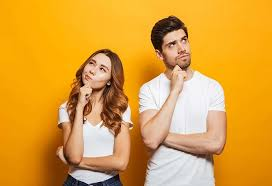

# Importing Neccessary Libraries

In [ ]:
import numpy as np
import os
import imghdr
import matplotlib.pyplot as plt
import cv2
from tensorflow  import keras
from tensorflow.keras import Sequential
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.utils import compute_class_weight
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import save_model
from sklearn.metrics import classification_report
from google.colab import drive

# Downloading the Dataset

In [ ]:
!kaggle datasets download -d playlist/men-women-classification

Dataset URL: https://www.kaggle.com/datasets/playlist/men-women-classification
License(s): copyright-authors
 99% 1.17G/1.19G [00:16<00:00, 42.7MB/s]
100% 1.19G/1.19G [00:16<00:00, 75.1MB/s]


In [ ]:
!unzip /content/men-women-classification.zip

Streaming output truncated to the last 5000 lines.
  inflating: data/women/00000260.jpg  
  inflating: data/women/00000261.jpg  
  inflating: data/women/00000262.jpg  
  inflating: data/women/00000263.jpg  
  inflating: data/women/00000264.jpg  
  inflating: data/women/00000265.jpg  
  inflating: data/women/00000266.jpg  
  inflating: data/women/00000267.jpg  
  inflating: data/women/00000268.jpg  
  inflating: data/women/00000269.jpg  
  inflating: data/women/00000270.jpg  
  inflating: data/women/00000271.jpg  
  inflating: data/women/00000272.jpg  
  inflating: data/women/00000273.jpg  
  inflating: data/women/00000274.jpg  
  inflating: data/women/00000275.jpg  
  inflating: data/women/00000276.JPG  
  inflating: data/women/00000277.jpg  
  inflating: data/women/00000279.jpg  
  inflating: data/women/00000280.png  
  inflating: data/women/00000281.jpg  
  inflating: data/women/00000282.jpg  
  inflating: data/women/00000283.jpg  
  inflating: data/women/00000285.jpg  
  inflating: 

In [ ]:
dir = "/content/data"
men_dir = '/content/data/men'
women_dir = '/content/data/women'

# Data Cleaning and processing

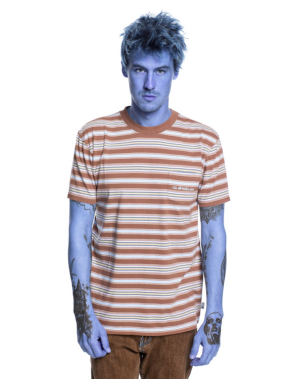

In [ ]:
temp_img = cv2.imread('/content/data/men/00000001.jpg')
plt.imshow(temp_img)
plt.axis("off")
plt.show()

In [ ]:
men_imgs = os.listdir(men_dir)
women_imgs = os.listdir(women_dir)

print(f"The number of images in men directory is {len(men_imgs)}.\nThe number of images in women directory is {len(women_imgs)}.")

The number of images in men directory is 1418.
The number of images in women directory is 1912.


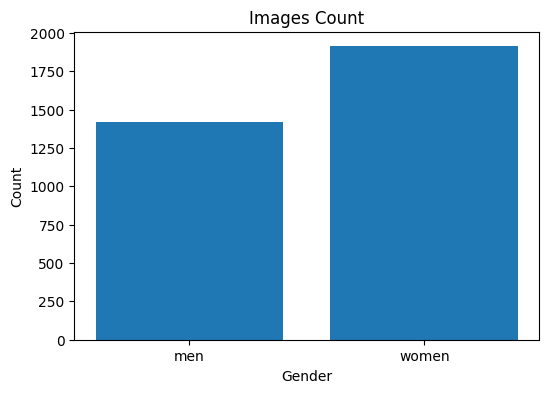

In [ ]:
plt.figure(figsize=(6, 4))
plt.bar(['men', 'women'], [len(men_imgs), len(women_imgs)])
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Images Count")
plt.show()

In [ ]:
valid_img_formats = ['jpg', 'jpeg', 'png']

for root, dirs, files in os.walk(dir):
  for file in files:
    img_path = os.path.join(root, file)
    if imghdr.what(img_path) not in valid_img_formats:
      os.remove(img_path)

In [ ]:
men_imgs = os.listdir(men_dir)
women_imgs = os.listdir(women_dir)

print(f"The number of images in men directory is {len(men_imgs)}.\nThe number of images in women directory is {len(women_imgs)}.")

The number of images in men directory is 1352.
The number of images in women directory is 1820.


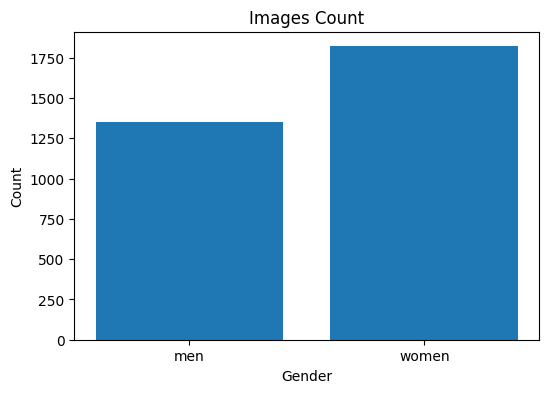

In [ ]:
plt.figure(figsize=(6, 4))
plt.bar(['men', 'women'], [len(men_imgs), len(women_imgs)])
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Images Count")
plt.show()

In [ ]:
img_data = []
labels = []

for img1_path, img2_path in zip(men_imgs, women_imgs):
  man_img_path = os.path.join(men_dir, img1_path)
  man_img = cv2.imread(man_img_path)
  man_img = cv2.resize(man_img, (224, 224))
  man_img = np.array(man_img, dtype=np.float32) / 255.0

  img_data.append(man_img)
  labels.append(0)

  woman_img_path = os.path.join(women_dir, img2_path)
  woman_img = cv2.imread(woman_img_path)
  woman_img = cv2.resize(woman_img, (224, 224))
  woman_img = np.array(woman_img, dtype=np.float32) / 255.0

  img_data.append(woman_img)
  labels.append(1)

img_data = np.array(img_data, dtype = np.float32)
labels = np.array(labels)

In [ ]:
img_data.shape, labels.shape

((2704, 224, 224, 3), (2704,))

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(img_data, labels, test_size=0.2, random_state = 2)

In [ ]:
np.unique(Y_test)

array([0, 1])

# CNN Architecture

In [ ]:
vgg16_conv = VGG16(
  weights = 'imagenet',
  include_top = False,
  input_shape = (224, 224, 3)
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
vgg16_conv.trainable = True
set_trainable = False

for layer in vgg16_conv.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True

  if set_trainable == True:
    layer.trainable = True
  else:
    layer.trainable = False

for layer in vgg16_conv.layers:
  print(layer.name,layer.trainable)

input_layer False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [ ]:
model = Sequential()

model.add(vgg16_conv)

model.add(Flatten())

model.add(Dense(256, activation = 'relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer= RMSprop(learning_rate=1e-5), loss='binary_crossentropy', metrics=['Accuracy'])

In [ ]:
class_weights  = compute_class_weight(class_weight='balanced', classes = np.unique(Y_train), y = Y_train)
class_weights_dict = dict(enumerate(class_weights))
class_weights_dict

{0: 1.0023169601482855, 1: 0.9976937269372693}

In [ ]:
path = 'gender_detector.keras'
model_checkpoint = ModelCheckpoint(
    filepath = path,
    monitor = "val_loss",
    verbose = 1,
    save_best_only = True,
    save_weights_only = False,
    mode = 'min',
    save_freq = 'epoch'
)

# Save only the weights
weights_checkpoint = ModelCheckpoint(
    filepath='gender_detector_weights.weights.h5',
    monitor="val_loss",
    verbose=1,
    save_best_only=True,
    save_weights_only=True,  # Save only the weights
    mode='min',
    save_freq='epoch'
)

early_stopping = EarlyStopping(
    monitor = 'val_loss',
    patience = 5,
    verbose = 1,
    mode = "min",
    restore_best_weights=True
)

# Training the Model

In [ ]:
history = model.fit(
    X_train,
    Y_train,
    validation_data=(X_test, Y_test),
    epochs = 50,
    class_weight = class_weights_dict,
    callbacks= [model_checkpoint, weights_checkpoint, early_stopping]
)

Epoch 1/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step - Accuracy: 0.6550 - loss: 0.6267
Epoch 1: val_loss improved from inf to 0.43694, saving model to gender_detector.keras

Epoch 1: val_loss improved from inf to 0.43694, saving model to gender_detector_weights.weights.h5
68/68 ━━━━━━━━━━━━━━━━━━━━ 59s 646ms/step - Accuracy: 0.6558 - loss: 0.6257 - val_Accuracy: 0.7911 - val_loss: 0.4369
Epoch 2/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - Accuracy: 0.8576 - loss: 0.3452
Epoch 2: val_loss improved from 0.43694 to 0.38133, saving model to gender_detector.keras

Epoch 2: val_loss improved from 0.43694 to 0.38133, saving model to gender_detector_weights.weights.h5
68/68 ━━━━━━━━━━━━━━━━━━━━ 43s 274ms/step - Accuracy: 0.8575 - loss: 0.3452 - val_Accuracy: 0.8392 - val_loss: 0.3813
Epoch 3/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - Accuracy: 0.9090 - loss: 0.2453
Epoch 3: val_loss did not improve from 0.38133

Epoch 3: val_loss did not improve from 0.38133
68/68 ━━━━━━━━━━━━━━━━━━━━ 15s 

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,640,196 (132.14 MB)

 Trainable params: 13,502,465 (51.51 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

 Optimizer params: 13,502,467 (51.51 MB)

# Accuracy and Training Graph

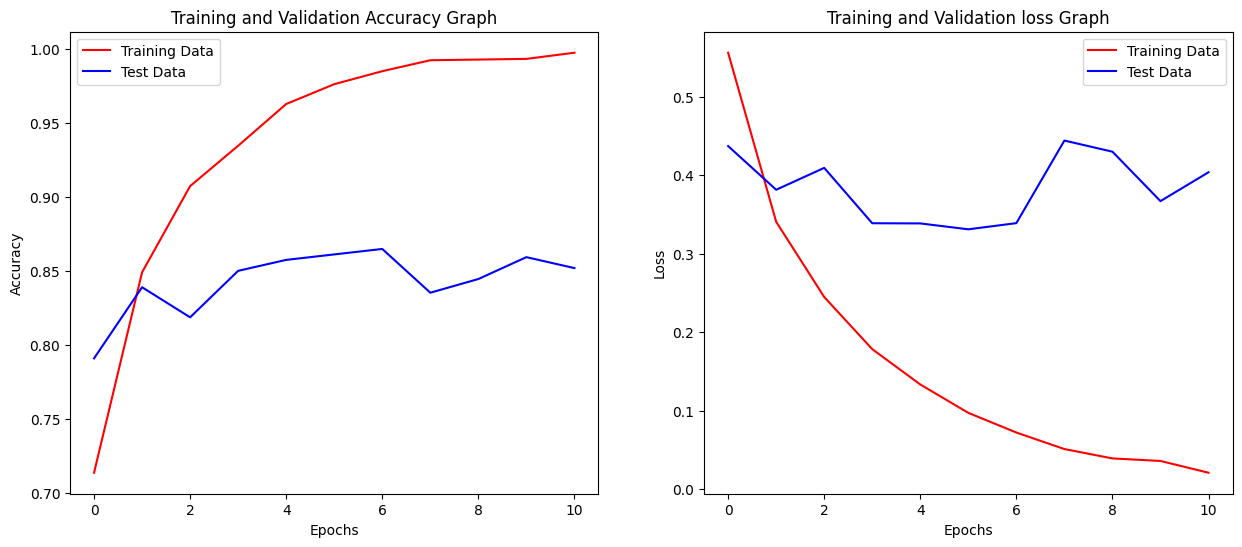

In [ ]:
plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
plt.plot(history.history['Accuracy'], color='r', label="Training Data")
plt.plot(history.history['val_Accuracy'], color='b', label="Test Data")
plt.xlabel('Epochs')
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training and Validation Accuracy Graph")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], color='r', label="Training Data")
plt.plot(history.history['val_loss'], color='b', label="Test Data")
plt.xlabel('Epochs')
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation loss Graph")

plt.show()

# Model Evaluation

In [ ]:
predictions = model.predict(X_test)

17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 164ms/step


In [ ]:
# Extract predicted labels from the prediction
prediction_list = []

for pred in predictions:
    prediction_list.append(int(np.round(pred[0])))

prediction_list = np.array(prediction_list, dtype=np.int32)

In [ ]:
prediction_list

array([0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,

In [ ]:
len(prediction_list), len(Y_test)

(541, 541)

In [ ]:
# Generate the classification report
report = classification_report(Y_test, prediction_list, target_names=['Men', 'Women'])
print(report)

              precision    recall  f1-score   support

         Men       0.87      0.85      0.86       273
       Women       0.85      0.87      0.86       268

    accuracy                           0.86       541
   macro avg       0.86      0.86      0.86       541
weighted avg       0.86      0.86      0.86       541



# Testing on Random Images

In [ ]:
def predict_gender(img_path):
    img = cv2.imread(img_path)
    img_resize = cv2.resize(img, (224, 224))
    img_resize = np.array(img_resize, dtype=np.float32)
    img_resize /= 255.0
    img_input = img_resize.reshape(1, 224, 224, 3)
    prediction = model.predict(img_input)

    if prediction[0][0] < 0.5:
        title = "He is a Men."
    else:
        title = "She is a Women."

    plt.figure(figsize=(3, 2))
    plt.axis("off")
    plt.title(title)
    plt.imshow(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


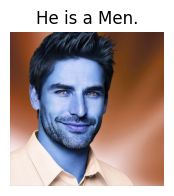

In [ ]:
predict_gender('/content/data/men/00000009.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


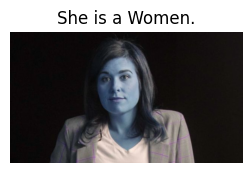

In [ ]:
predict_gender('/content/data/women/00000102.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


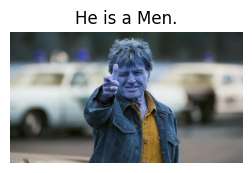

In [ ]:
predict_gender('/content/data/men/00001101.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


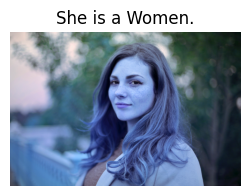

In [ ]:
predict_gender('/content/data/women/00000005.jpeg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


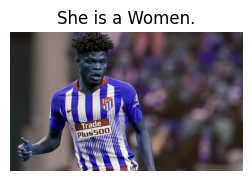

In [ ]:
predict_gender('/content/data/men/00001153.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


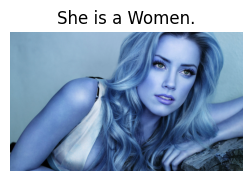

In [ ]:
predict_gender('/content/data/women/00000851.jpg')

# Uploading the Model on Drive

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Define the path where you want to save the model in your Google Drive
model_save_path = '/content/drive/MyDrive/Image_classification/gender_detector.keras'
# Save your trained model to the specified path
model.save(model_save_path)

In [ ]:
# Unmount Google Drive
drive.flush_and_unmount()